# 10-1. 들어가며


### 전처리는 왜 중요할까?
---
안녕하세요, 오늘은 모델에 데이터를 넣기 전까지 과정, 즉 데이터 전처리를 집중적으로 볼 것입니다. 전설의 포켓몬과 일반 포켓몬을 분류하기 위해 모델을 만드는 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리 노드에서 다루듯 아무 처리하지 않은 데이터와 가공한 데이터를 모델에 넣어봤을 때 성능 차이가 납니다. 그러니 오늘 배울 데이터 전처리를 꼼꼼히 숙지해 주세요 😃

“데이터 분석의 8할은 데이터 전처리이다.”라는 말이 있습니다. 왜 데이터 분석에 있어 전처리는 중요한 걸까요?

전처리에 따라서 데이터 분석의 질이 달라지기 때문입니다. 전처리가 충분히 되어있지 않거나 잘못된 데이터를 사용한 경우 분석 결과의 신뢰도가 떨어지고, 예측 모델의 정확도도 떨어질 것입니다. 전처리가 잘 되어 있는 경우 데이터 분석의 질이 높아지고 예측 모델의 성능을 높일 수 있습니다.

물론 데이터를 전처리하는 작업은 지루해 보일 수 있지만, 꼭 필요한 과정인 만큼 다양한 데이터로 연습을 해보시길 바랍니다.

그럼 시작하겠습니다.

### 데이터를 준비하자!
---
위 파일은 미리 준비되어 있습니다. 클라우드 쉘을 열어 다음과 같이 작업 디렉터리를 만들고 데이터를 연결해 주세요.
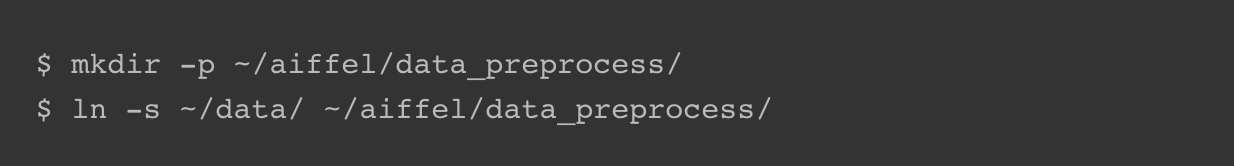

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("👽 Hello.")

👽 Hello.


준비된 ``trade.csv`` 파일은 [관세청 수출입 무역 통계](https://unipass.customs.go.kr/ets/index.do) 에서 가공한 데이터입니다.

특정 국가에 대한 월별 수출입 건수와 금액(단위:천 불(USD 1,000))이 있습니다. 무역수지는 수출금액-수입금액이 됩니다.

In [2]:
import os

csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


### 학습 목표
---
- 중복된 데이터를 찾아 제거할 수 있고, 결측치(missing data)를 제거하거나 채워 넣을 수 있다.
- 데이터를 정규화시킬 수 있다.
- 이상치(outlier)를 찾고, 이를 처리할 수 있다.
- 범주형 데이터를 원-핫 인코딩할 수 있다.
- 연속적인 데이터를 구간으로 나눠 범주형 데이터로 변환할 수 있다.

### 학습 목차
---
1. 결측치(Missing Data)
2. 중복된 데이터
3. 이상치(Outlier)
4. 정규화(Normalization)
5. 원-핫 인코딩(One-Hot Encoding)
6. 구간화(Binning)

# 10-2. 결측치(Missing Data)
현실에서 여러분이 다룰 데이터는 결측치를 포함하고 있는 경우가 많습니다. 물론 데이터를 수집하는 과정에서 누락되지 않도록 하는 것이 더 좋은 방법이지만 이미 결측치가 존재한다면 이를 처리해 주어야 합니다.

결측치를 처리하는 방법은 크게 두 가지가 있습니다.

1. 결측치가 있는 데이터를 제거한다.
2. 결측치를 어떤 값으로 대체한다.
     - 결측치를 대체하는 방법은 다양한데 데이터마다 특성을 반영하여 해결해야 합니다.
     
우선 결측치 여부를 먼저 살펴보겠습니다.



In [3]:
print('전체 데이터 건수:', len(trade))
print(trade.count())

전체 데이터 건수: 199
기간      199
국가명     199
수출건수    196
수출금액    195
수입건수    196
수입금액    196
무역수지    195
기타사항      0
dtype: int64


전체 데이터 건수에서 각 컬럼별 값이 있는 데이터 수를 빼주면 컬럼별 결측치의 개수를 알 수 있습니다.

In [4]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

``'기타사항'``을 보시면 전부 결측치라는 것을 알 수 있습니다. 이는 아무런 정보가 없는 컬럼이므로 삭제하도록 하겠습니다.



In [5]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


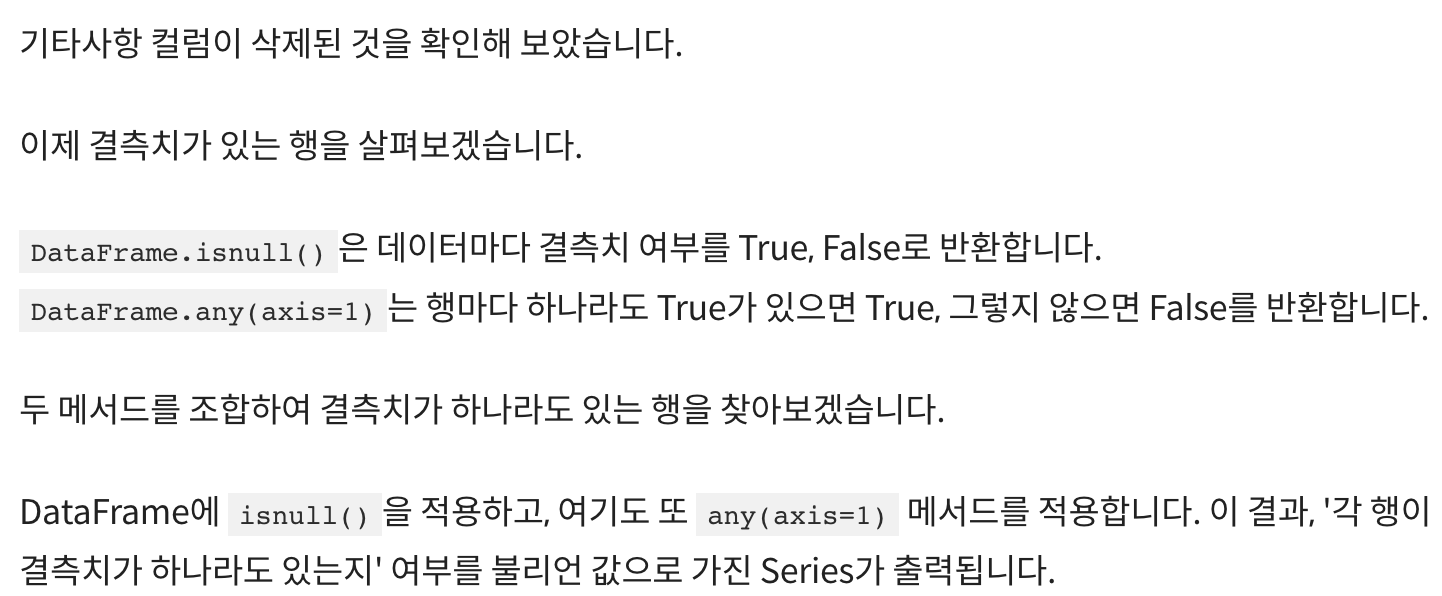

In [6]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [7]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

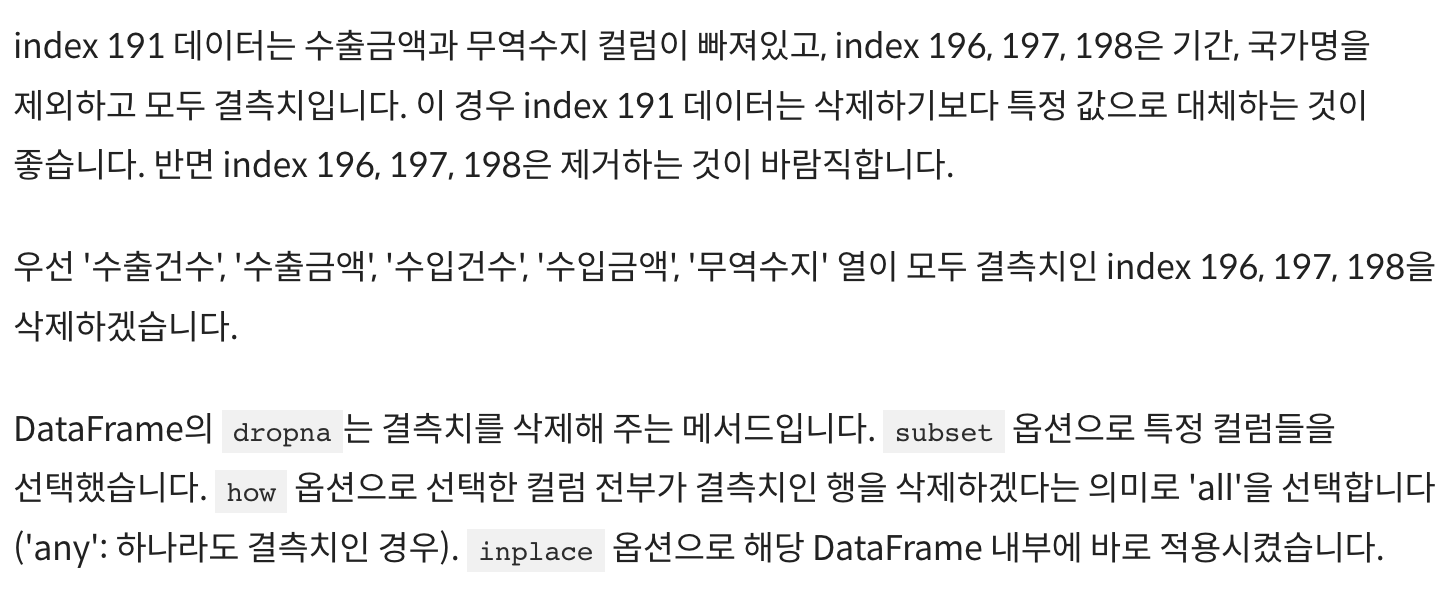

In [8]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [9]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


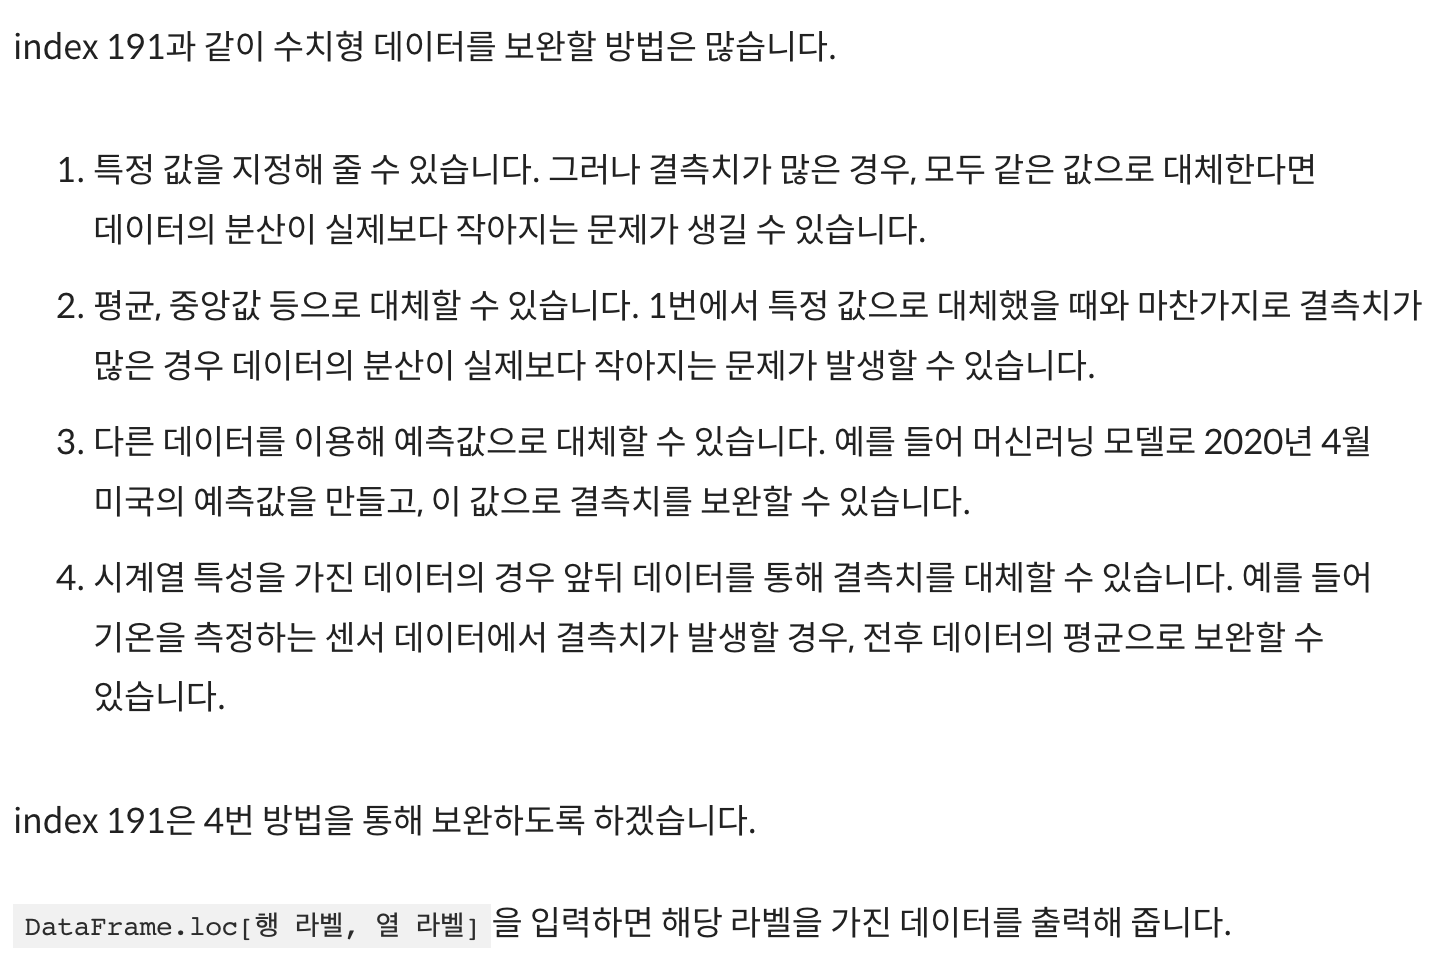

In [10]:
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


index 191의 수출금액 컬럼값을 이전 달과 다음 달의 평균으로 채우도록 합니다.

In [11]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


index 191의 무역수지 컬럼은 수출금액과 수입금액의 차이를 이용하여 채우도록 하겠습니다.

In [12]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] 
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


다른 방법을 이용하여 index 191을 채워보는 연습을 하시기 바랍니다.

In [13]:
a = trade[trade['국가명']== '미국']
print(a['수출금액'].mean())
print(a['수입금액'].mean())
average = a['수출금액'].mean() - a['수입금액'].mean()
print(average)
print(a['무역수지'].mean())

5853560.076923077
4376415.938461538
1477144.1384615386
1477144.1692307692


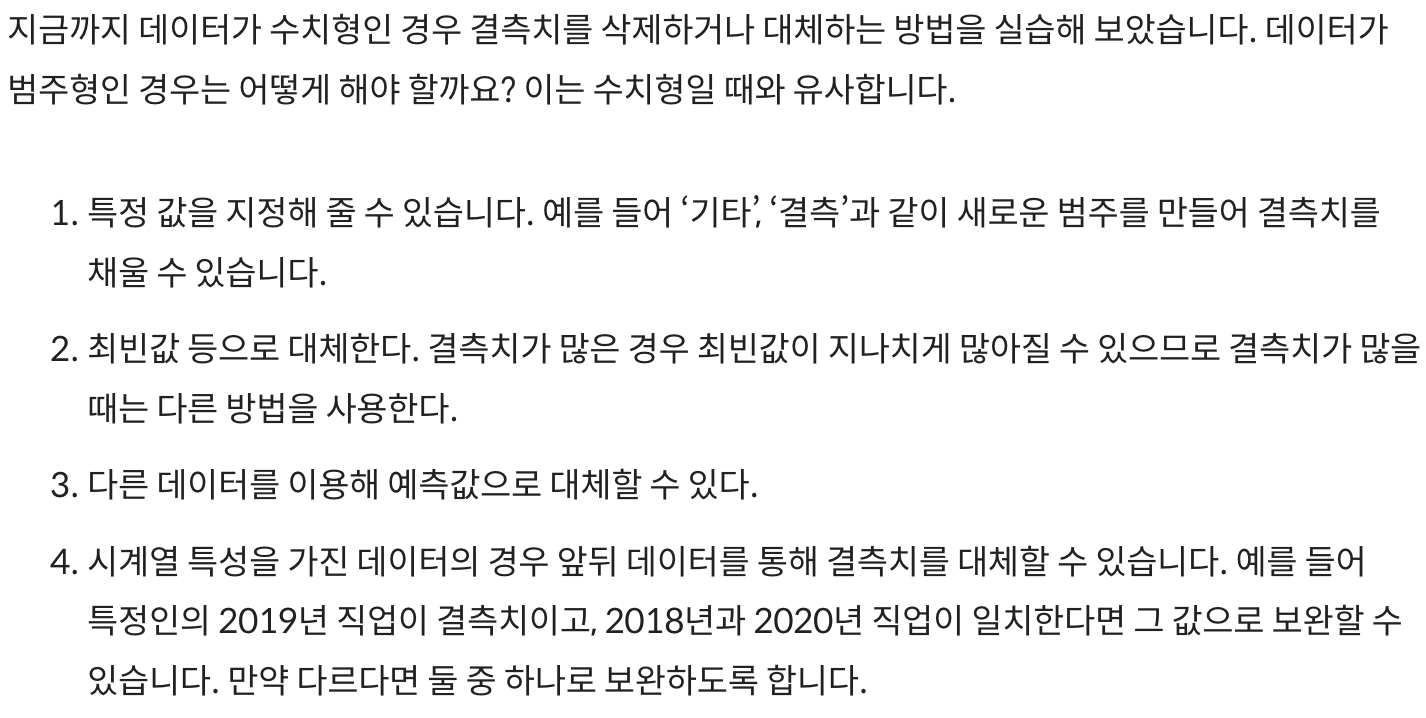

# 10-3. 중복된 데이터
데이터를 수집하는 과정에서 중복된 데이터가 생길 수 있습니다. 같은 값을 가진 데이터 없이 행(row)별로 값이 유일해야 한다면 중복된 데이터를 제거해야 합니다.

우선 중복된 데이터를 확인합니다. ``DataFrame.duplicated()``는 중복된 데이터 여부를 불리언 값으로 반환해 줍니다.

In [14]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [15]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [16]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


index 186, 187이 중복되어 있습니다.

pandas에서는 ``DataFrame.drop_duplicates``를 통해 중복된 데이터를 손쉽게 삭제할 수 있습니다.

In [17]:
trade.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


``DataFrame.drop_duplicates``를 좀 더 자세히 살펴볼까요?

다음과 같이 id와 name을 컬럼으로 갖는 df가 있다고 해봅시다.

In [18]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


id가 002인 데이터가 2개 있습니다. id가 사람마다 unique 하다고 할 때, 둘 중 하나는 삭제해야 합니다.

index가 클수록 나중에 들어온 데이터이고, 사용자가 이름을 수정했을 때 업데이트가 되지 않고 삽입이 되어 생긴 문제라고 가정합니다. 즉, id가 중복된 경우 맨 나중에 들어온 값만 남겨야 합니다.

``DataFrame.drop_duplicates``의 ``subset``, ``keep`` 옵션을 통해 손쉽게 중복을 제거할 수 있습니다.

- [DataFrame.drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

In [19]:
df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


# 10-4. 이상치(Outlier)
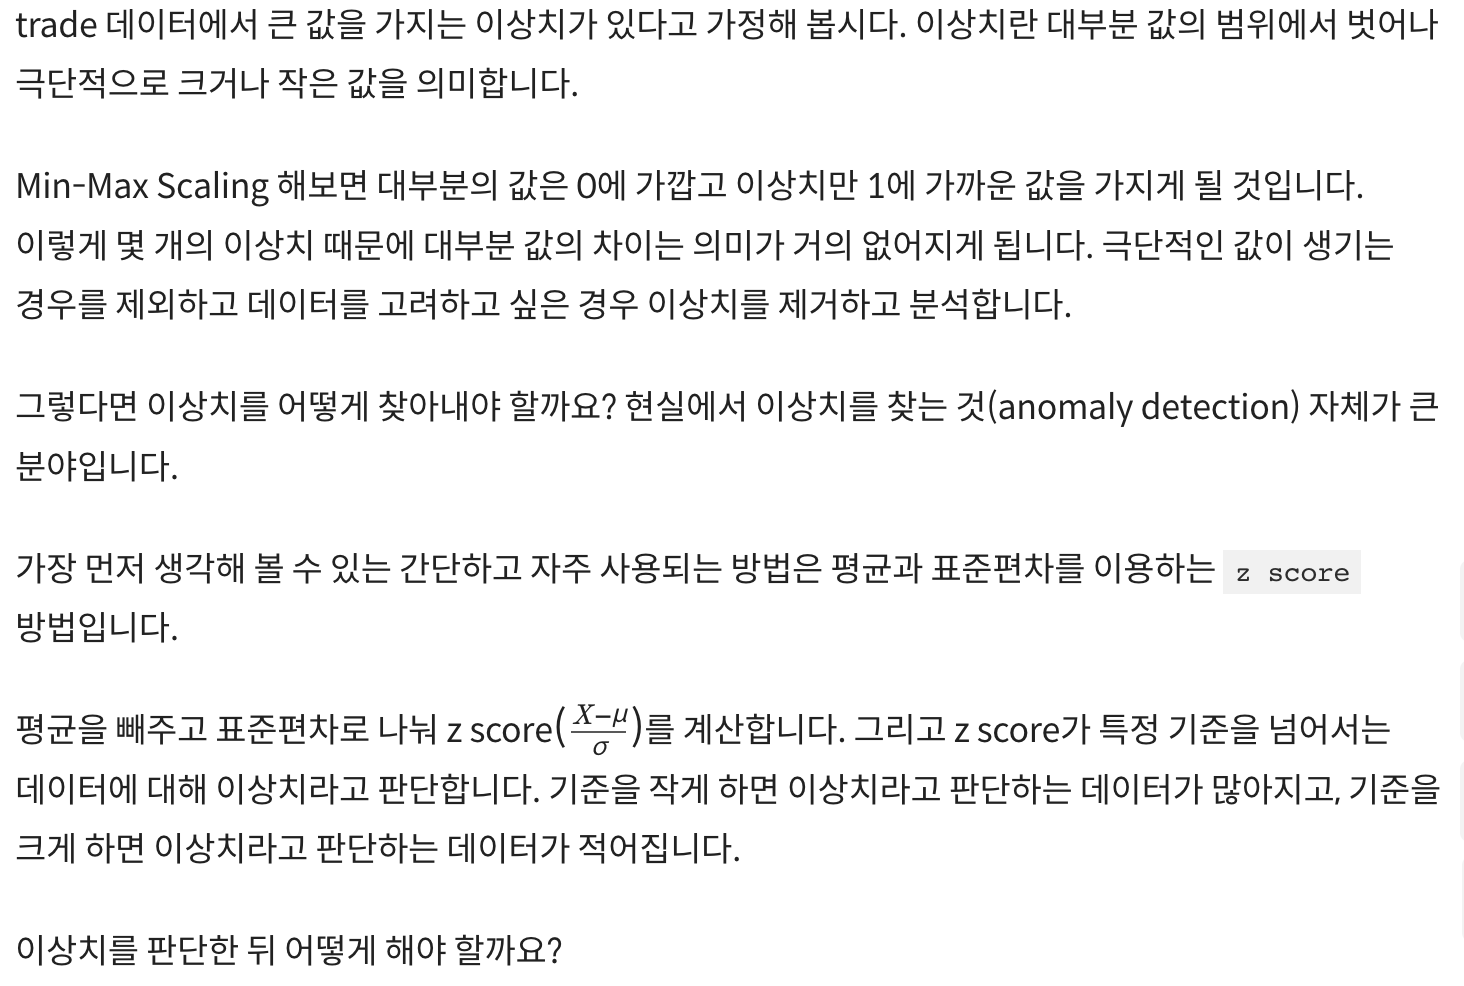

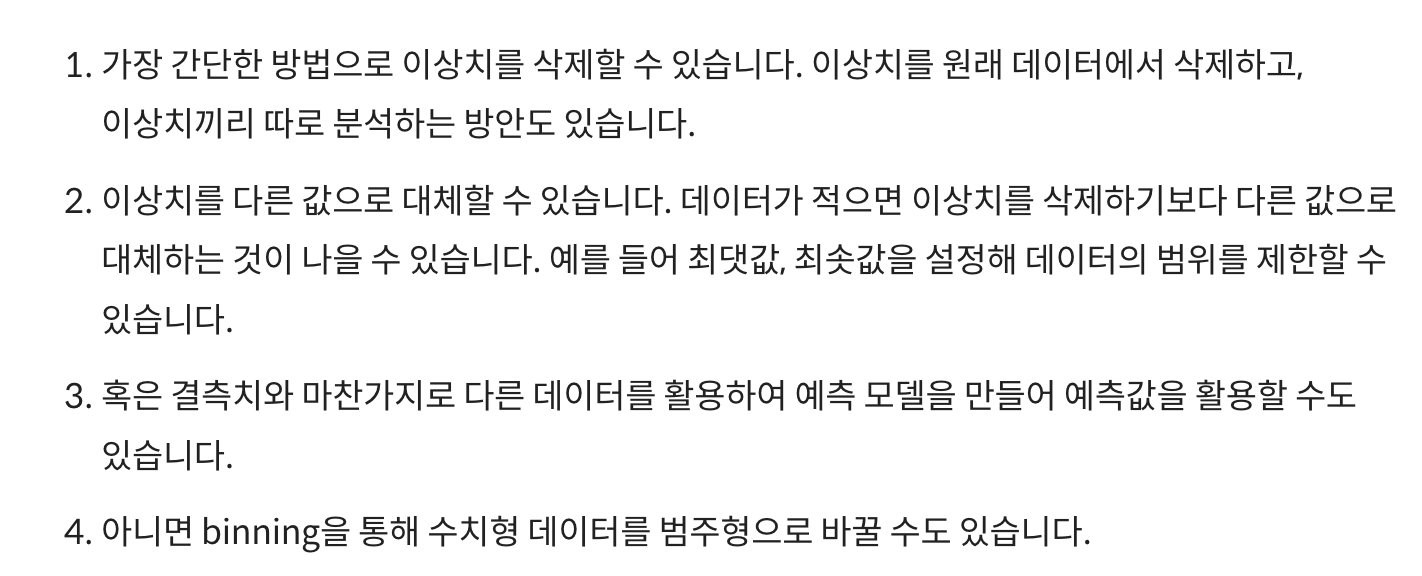

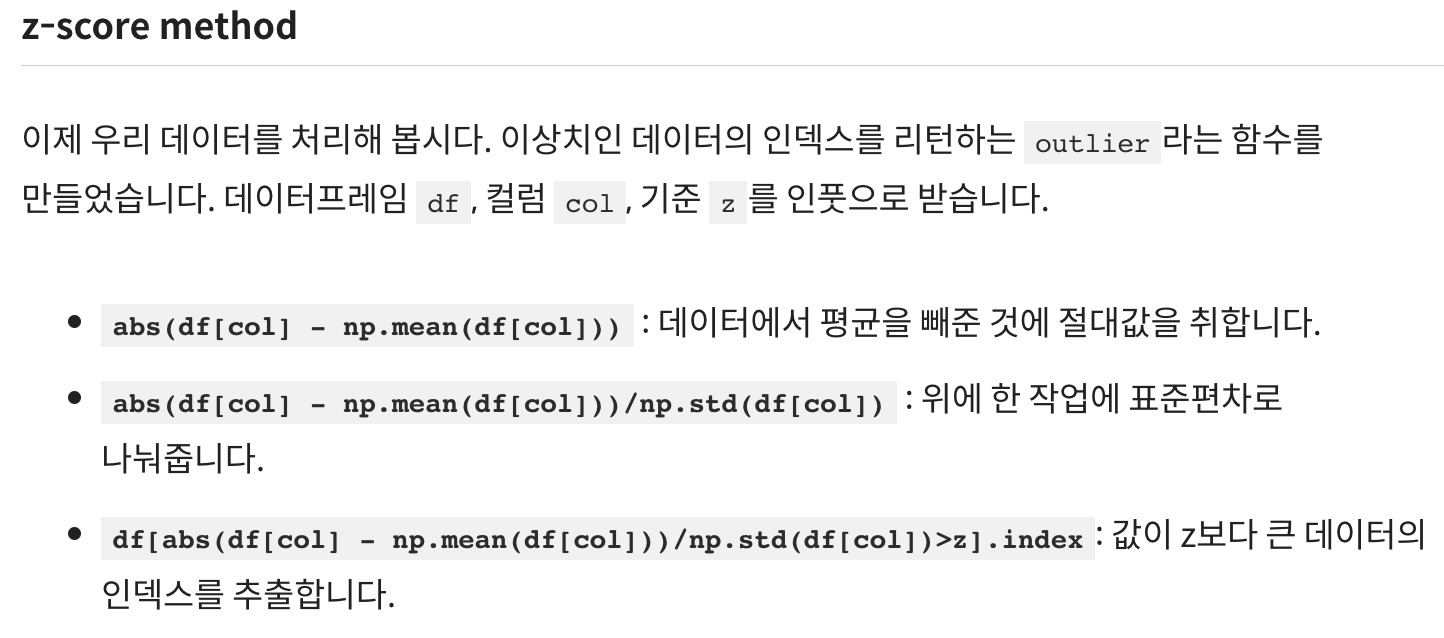

In [20]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [21]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [22]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [23]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


무역수지의 이상치를 확인하는데 기준 되는 값이 클수록 이상치가 적어지는 것을 확인할 수 있습니다.

이제 ``not_outlier``라는 함수를 통해 무역수지가 이상치 값이 아닌 데이터만 추출하도록 하겠습니다.

In [24]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [25]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


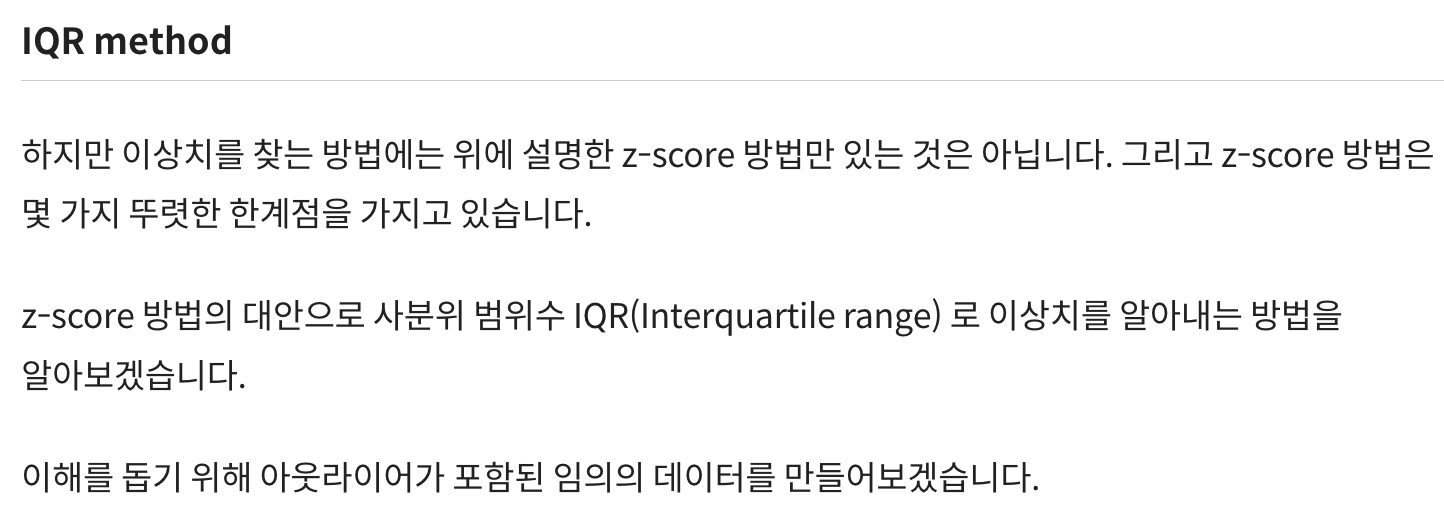

In [26]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

아래의 박스 플롯에서 박스를 벗어난 점들이 보이시나요?

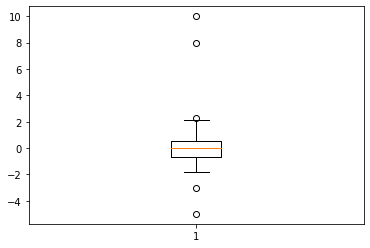

In [27]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

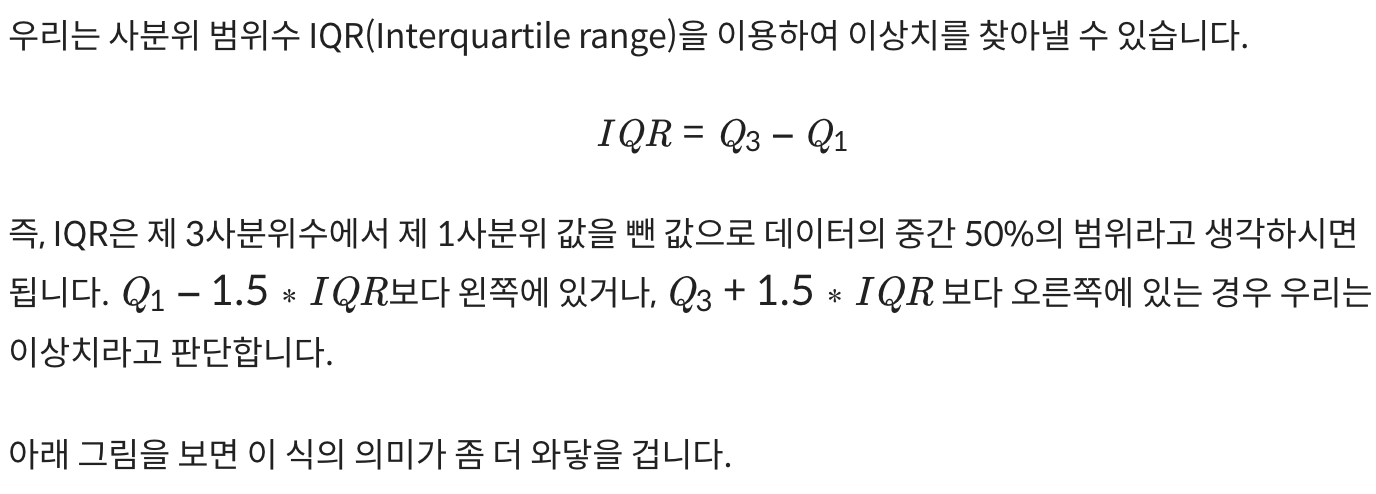

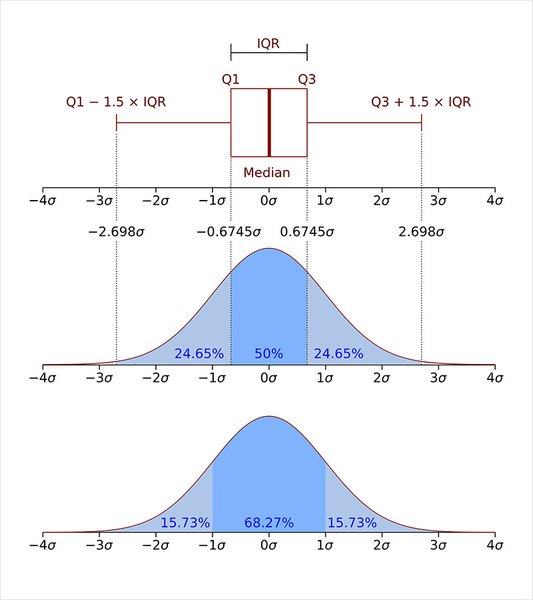

[출처](https://en.wikipedia.org/wiki/Interquartile_range)

IQR을 구하기 위해 우선 제1사분위수와 제 3사분위수를 구합니다.

In [28]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

IQR과 제 1사분위수, 제 3사분위수를 이용하여 이상치를 확인할 수 있습니다.

In [29]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

위에서 z-score 방법과 IQR 방법에 대해서 알아보았습니다. 그럼 다음 링크의 아티클을 읽어보고 질문에 답해 봅시다.

- [Three ways to detect outliers](http://colingorrie.github.io/outlier-detection.html)

### Q1. 이 글에서 말하는 z-score 방법이 가지는 뚜렷한 단점 2가지가 무엇인가요?

1) Robust하지 못하다 - 왜나하면 평균과 표준편차 자체가 이상치의 존재에 크게 영향을 받기 때문이다.

2) 작은 데이터셋의 경우 z-score의 방법으로 이상치를 알아내기 어렵다. 특히 item이 12개 이하인 데이터셋에서는 불가능하다.

무역수지를 기준으로 이상치를 찾는 실습을 해보도록 하겠습니다. 아래 코드에서 outlier2(df, col) 메서드를 구현해 보세요.

In [31]:
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr)|(df[col] > q3+1.5*iqr)]

outlier2(trade, '무역수지')


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


# 10-5. 정규화(Normalization)
trade 데이터를 보면 수입건수, 수출건수와 수입금액, 수출금액, 무역수지는 단위가 다르다는 것을 알 수 있습니다.

이처럼 컬럼마다 스케일이 크게 차이가 나는 데이터를 입력하면 머신러닝 모델 학습에 문제가 발생할 수 있습니다. 예를 들어 데이터의 범위가 0에서 1 사이인 컬럼 A과 1000에서 10000 사이인 컬럼 B가 있다고 생각해 봅시다. 이런 데이터를 클러스터링 한다고 가정해 봅시다. 데이터 간의 거리를 잴 때, 범위가 큰 컬럼 B의 값에만 영향을 크게 받을 것입니다. 다른 예시로 간단한 linear regression을 한다고 가정해 봅시다. 모델의 파라미터를 업데이트하는 과정에서 범위가 큰 컬럼 B의 파라미터만 집중적으로 업데이트하는 문제가 생길 수 있습니다. 그래서 일반적으로 컬럼 간에 범위가 크게 다를 경우 전처리 과정에서 데이터를 정규화합니다.

정규화를 하는 방법은 다양하지만, 가장 잘 알려진 표준화(Standardization)와 Min-Max Scaling을 알아보도록 하겠습니다.

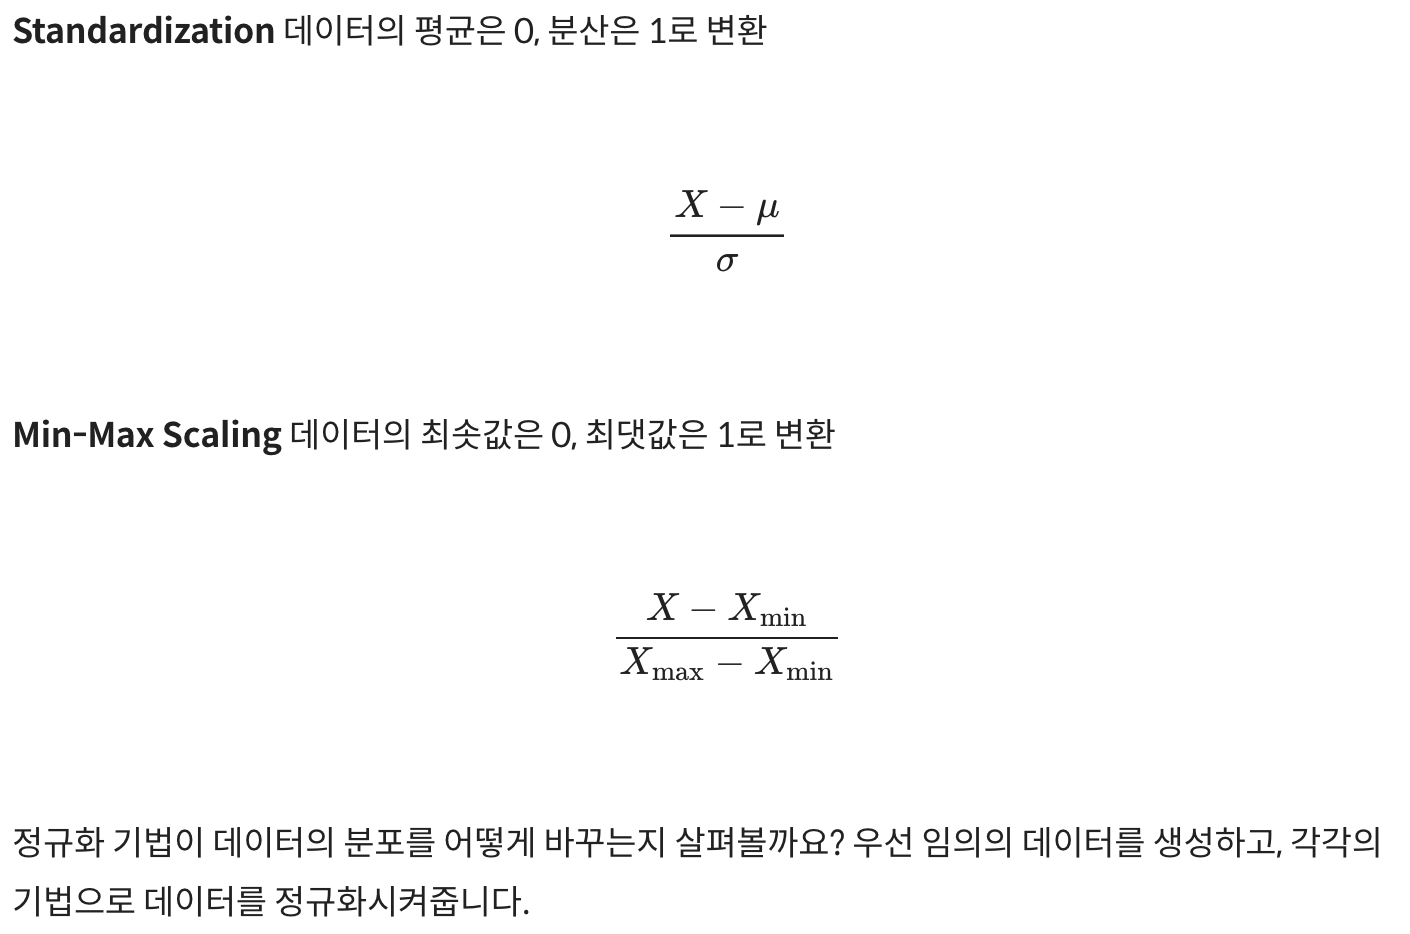

In [32]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [33]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


In [34]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


다음 이미지는 데이터를 Standardization 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 평균은 0으로, 분산은 1로 데이터를 바꿔줍니다.

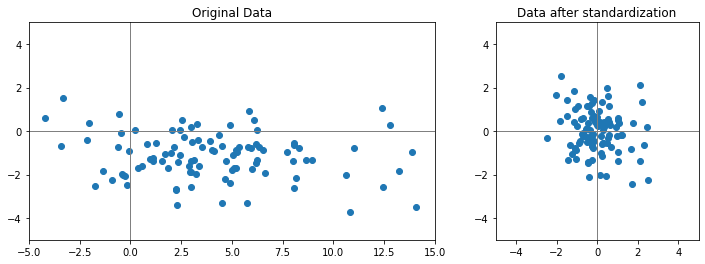

In [35]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

다음 이미지는 동일한 데이터를 min-max scaling 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 최솟값은 0, 최댓값은 1로 바꿔줍니다.

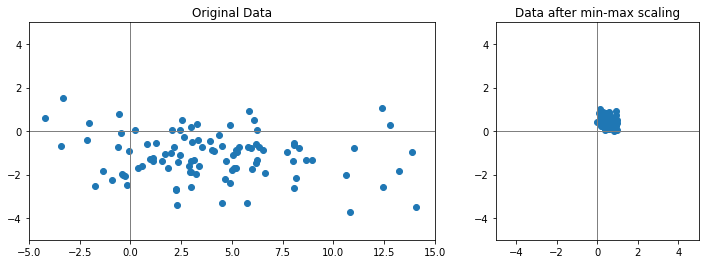

In [36]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

그럼 우리가 가진 trade 데이터를 살펴봅시다.



### Standardization

우선 정규화를 시켜야 할 수치형 컬럼들을 cols 변수에 담은 후, 데이터에서 평균을 빼고, 표준편차로 나눠주도록 합니다.

In [37]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


standardization 방법으로 정규화시킨 trade_Standardization을 확인해 보겠습니다. 각 컬럼의 평균들을 보면 거의 0에 가깝고, 표준편차는 1에 가까운 것을 확인하실 수 있습니다.



In [38]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,2.277381e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


### Min-Max Scaling

데이터에서 최솟값을 빼주고, '최댓값-최솟값'으로 나눠줍니다.

In [39]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


Min-Max Scaling 방법으로 정규화시킨 후, 각 컬럼의 최솟값(min)은 0이고, 최댓값(max)은 1임을 확인할 수 있습니다.

In [40]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


**주의!!**

train 데이터와 test 데이터가 나눠져 있는 경우 **train 데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화** 시켜줘야 합니다.

In [41]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


아래 코드를 자세히 보시기 바랍니다.

In [42]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min)/(train_max - train_min)
test_min_max =  (test - train_min)/(train_max - train_min)    # test를 min-max scaling할 때도 train 정규화 기준으로 수행
print("💫 It's okay, no biggie...")

💫 It's okay, no biggie...


In [43]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [44]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


scikit-learn의 ``StandardScaler``, ``MinMaxScaler``를 사용하는 방법도 있습니다.

In [45]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [46]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [47]:
scaler.transform(test)

array([[-0.25,  0.55]])

https://www.youtube.com/watch?time_continue=4&v=FDCfw-YqWTE&feature=emb_logo

이번 스텝에서 언급하지 않았지만, **로그 변환** 등의 기법도 정규화화 함께 사용하면 도움이 될 수 있다는 것도 기억해 주세요!

# 10-6. 원-핫 인코딩(One-Hot Encoding)


이제 범주형 데이터인 국가명 컬럼을 다뤄보도록 하겠습니다.

머신러닝이나 딥러닝 프레임워크에서 범주형을 지원하지 않는 경우 원-핫 인코딩을 해야 합니다.

원-핫 인코딩이란 무엇인가요?

원-핫 인코딩이란 카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법입니다. 그럼, pandas로 국가명 컬럼을 원-핫 인코딩을 해보겠습니다.

pandas에서 ``get_dummies`` 함수를 통해 손쉽게 원-핫 인코딩을 할 수 있습니다.

In [48]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


``pd.concat`` 함수로 데이터프레임 trade와 country를 합쳐줍니다.

In [49]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


이제는 필요 없어진 국가명 컬럼을 삭제해 주고 나면 trade는 우리가 원하는 데이터프레임이 됩니다.

In [50]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


# 10-7. 구간화(Binning)
지금까지 trade 데이터를 다루면서 다양 전처리 기법을 배웠습니다. 이제 다른 전처리 기법을 배워보도록 하겠습니다.

salary에 소득 데이터가 있다고 합시다.

In [51]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")

👽 Almost there..


이 데이터를 구간별로 나누고자 합니다. 이러한 기법을 구간화(``Data binning`` 혹은 ``bucketing``)이라고 부릅니다.

아래 히스토그램과 같이 연속적인 데이터를 구간을 나눠 분석할 때 사용하는 방법입니다.

<AxesSubplot:>

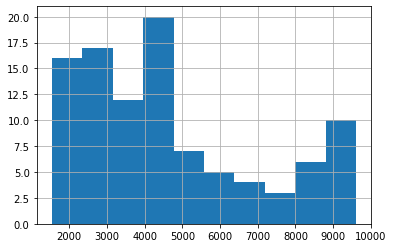

In [52]:
salary.hist()

pandas의 ``cut`` 과 ``qcut``을 이용해 수치형 데이터를 범주형 데이터로 변형시키도록 하겠습니다.

``cut``을 사용하기 위해 우선 구간을 정해줍니다

In [53]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
print("👽 Almost there..")

👽 Almost there..


cut 함수에 데이터와 구간을 입력하면 데이터를 구간별로 나눠줍니다.

In [54]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

``salary[0]``는 4300으로 4000에서 6000 사이에 포함되었다는 것을 확인할 수 있습니다.

In [55]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


구간별로 값이 몇 개가 속해 있는지 ``value_counts()``로 확인해 보겠습니다.

In [56]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

이렇게 특정 구간을 지정해 줘도 되고, 구간의 개수를 지정해 줄 수도 있습니다. ``bins`` 옵션에 정수를 입력하면 데이터의 최솟값에서 최댓값을 균등하게 ``bins`` 개수만큼 나눠줍니다.



In [57]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [58]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

``qcut``은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠줍니다.

In [59]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [60]:
print(ctg.value_counts().sort_index())
print(".\n.\n🛸 Well done!")

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64
.
.
🛸 Well done!


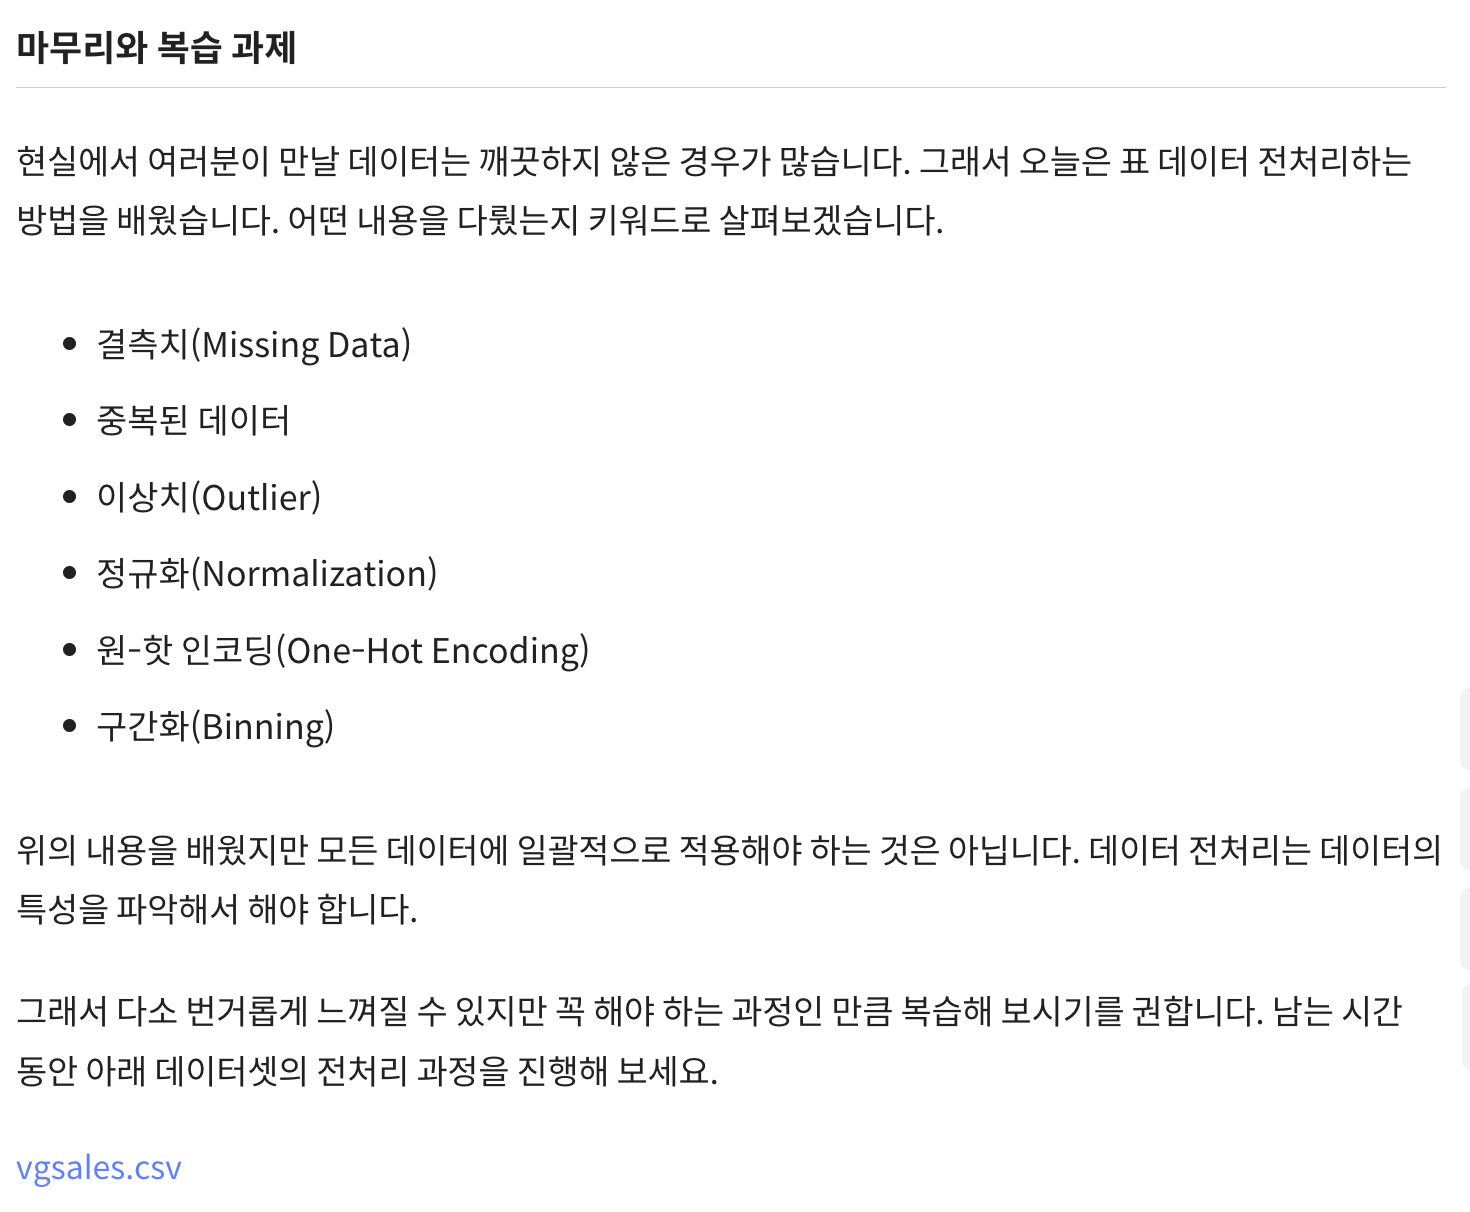

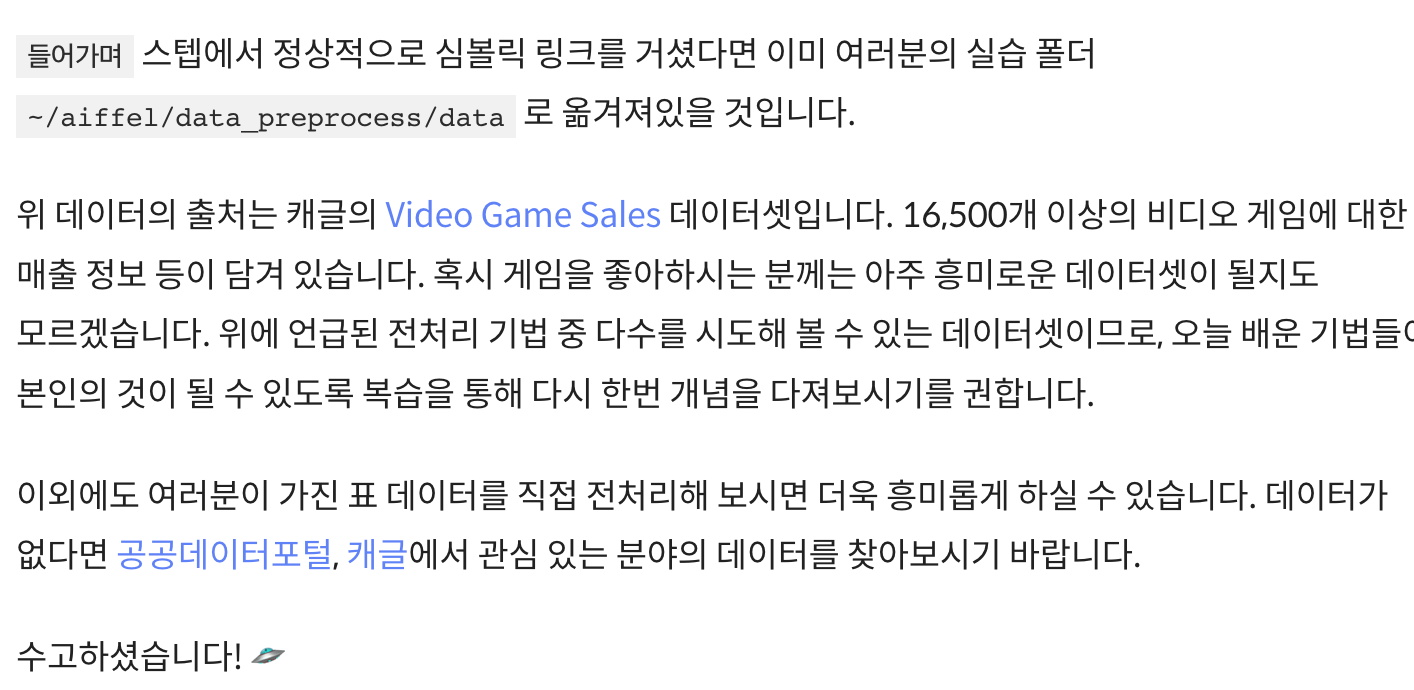

- https://www.kaggle.com/gregorut/videogamesales
- https://www.data.go.kr/
- https://www.kaggle.com/